# Exploring PyTorch Workflow

* Preapre Data
* Build Model
* Training Model
* Make Predictions
* Save and load model
* Putting all together

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
print(torch.__version__)

# Check if CUDA is available
print(torch.cuda.is_available())

# Check if cuDNN is enabled 
print(torch.backends.cudnn.enabled)

2.3.1+cu121
True
True


# Collecting/Preparing Data

In [2]:
# Create *Known* Parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(1)
y = weight * x + bias

x[: 10], y[: 10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Spliting data for train, validate, test

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape    


(torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

# Visualize the data

In [5]:
def plot(x, y,x_test,y_test, y_pred=None):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='y_true', color='green')
    plt.scatter(x_test, y_test, label='y_test', color='red')
    if y_pred is not None:
        plt.scatter(x, y_pred, label='y_pred', color='red')
    plt.legend()
    plt.show()



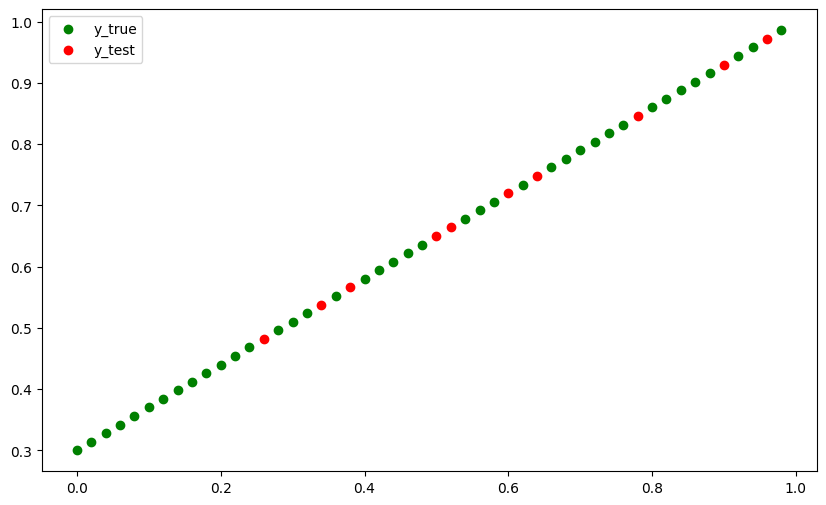

In [6]:
plot(x_train, y_train,x_test,y_test)

# Building Model


In [7]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### CHecking the content of our model

In [8]:
#creating a random seed
torch.manual_seed(42)

#create an instance of the model
model_0 = LinearRegression()
print(model_0)
print(list(model_0.parameters()))
print(model_0.state_dict())

LinearRegression()
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict({'weights': tensor([0.3367]), 'bias': tensor([0.1288])})


# Checking the model Preditive power

In [9]:
with torch.inference_mode():
    y_pred = model_0(x_test)
    print(y_pred[:5])

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433]])


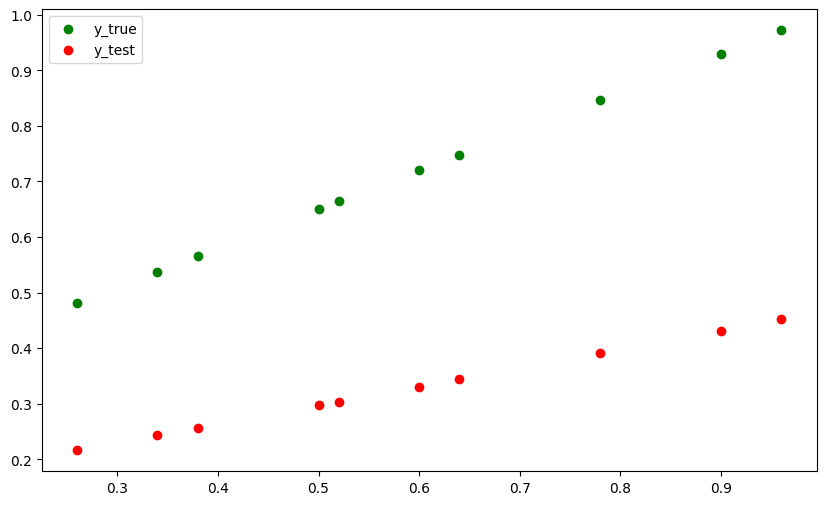

In [10]:
plot(x_test, y_test,x_test, y_pred)

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433]])


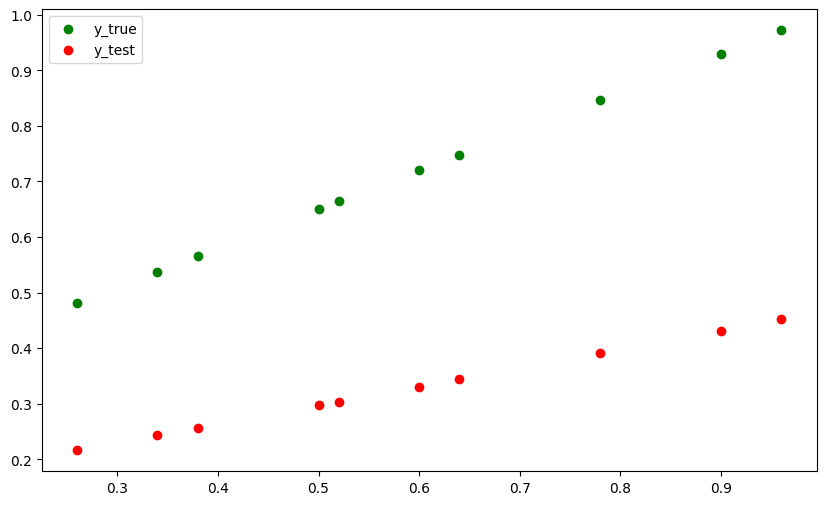

In [11]:
with torch.no_grad():
    y_pred = model_0(x_test)
    print(y_pred[:5])

plot(x_test, y_test,x_test, y_pred)

# Train the model
Model should be trained to get accurate results

### Setup loss function and Optimizer

In [12]:
# Loss Function
loss_fn = nn.MSELoss()

#Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

### Building a training loop

In [13]:
# Epochs
epochs = 1000

# Training Loop
for epoch in range(epochs):
    #Set the model to training mode
    model_0.train()
    # Forward Pass
    y_pred = model_0(x_train)

    # Compute Loss
    loss = loss_fn(y_pred, y_train)
    print(f'Epoch {epoch + 1}, Loss: {loss}')

    # Optimizer Zero Grad
    optimizer.zero_grad()

    # Backward Pass
    loss.backward()

    # Optimizer Step
    optimizer.step()


    model_0.eval() #set the model to evaluation mode/ turn off the gradient tracking

Epoch 1, Loss: 0.1275089979171753
Epoch 2, Loss: 0.12690117955207825
Epoch 3, Loss: 0.12629631161689758
Epoch 4, Loss: 0.12569445371627808
Epoch 5, Loss: 0.12509554624557495
Epoch 6, Loss: 0.12449957430362701
Epoch 7, Loss: 0.12390655279159546
Epoch 8, Loss: 0.1233164444565773
Epoch 9, Loss: 0.12272921949625015
Epoch 10, Loss: 0.1221449002623558
Epoch 11, Loss: 0.12156344950199127
Epoch 12, Loss: 0.12098486721515656
Epoch 13, Loss: 0.12040913105010986
Epoch 14, Loss: 0.11983621120452881
Epoch 15, Loss: 0.11926611512899399
Epoch 16, Loss: 0.11869882047176361
Epoch 17, Loss: 0.11813431978225708
Epoch 18, Loss: 0.1175725907087326
Epoch 19, Loss: 0.11701363325119019
Epoch 20, Loss: 0.11645741760730743
Epoch 21, Loss: 0.11590392887592316
Epoch 22, Loss: 0.11535316705703735
Epoch 23, Loss: 0.11480511724948883
Epoch 24, Loss: 0.1142597645521164
Epoch 25, Loss: 0.11371706426143646
Epoch 26, Loss: 0.11317707598209381
Epoch 27, Loss: 0.11263972520828247
Epoch 28, Loss: 0.11210501194000244
Epoch 

In [14]:
print(model_0.state_dict())

OrderedDict({'weights': tensor([0.4960]), 'bias': tensor([0.3724])})


# Predictions

tensor([[0.5014],
        [0.7593],
        [0.6700],
        [0.8188],
        [0.5411]])
Test Loss: 0.004340643994510174


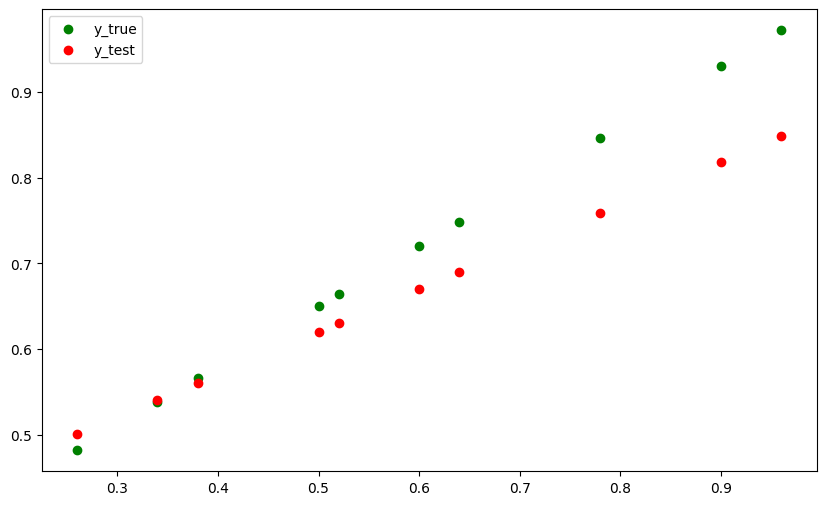

In [15]:
with torch.inference_mode():
    y_pred = model_0(x_test)
    print(y_pred[:5])
    test_loss = loss_fn(y_pred, y_test)
    print(f'Test Loss: {test_loss}')

plot(x_test, y_test,x_test, y_pred)

tensor([[0.5014],
        [0.7593],
        [0.6700],
        [0.8188],
        [0.5411]])
Test Loss: 0.004340643994510174


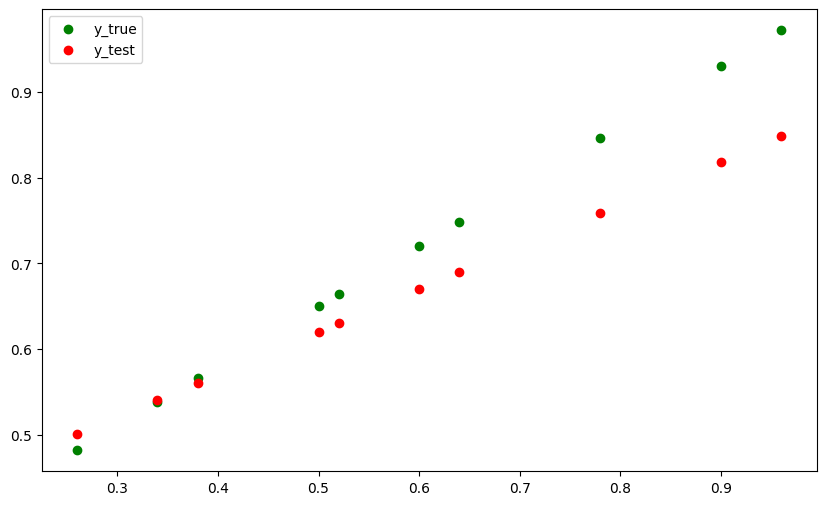

In [16]:
with torch.no_grad():
    y_pred = model_0(x_test)
    print(y_pred[:5])
    test_loss = loss_fn(y_pred, y_test)
    print(f'Test Loss: {test_loss}')

plot(x_test, y_test,x_test, y_pred)

# Testing Loop

In [29]:
# Epochs
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

# Training Loop
for epoch in range(epochs):
    #Set the model to training mode
    model_0.train()
    # Forward Pass
    y_pred = model_0(x_train)

    # Compute Loss
    loss = loss_fn(y_pred, y_train)

    # Optimizer Zero Grad
    optimizer.zero_grad()

    # Backward Pass
    loss.backward()

    # Optimizer Step
    optimizer.step()

    #Set the model to evaluation mode
    model_0.eval() #set the model to evaluation mode/ turn off the gradient tracking
    with torch.inference_mode():
        y_pred = model_0(x_test)
        test_loss = loss_fn(y_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'Epoch {epoch } | Train Loss: {loss} | Test Loss: {test_loss}') 
        print(model_0.state_dict())

Epoch 0 | Train Loss: 0.0024197823368012905 | Test Loss: 0.0016189960297197104
OrderedDict({'weights': tensor([0.5353]), 'bias': tensor([0.3806])})
Epoch 10 | Train Loss: 0.002412662608548999 | Test Loss: 0.0016125428956001997
OrderedDict({'weights': tensor([0.5356]), 'bias': tensor([0.3805])})
Epoch 20 | Train Loss: 0.0024055750109255314 | Test Loss: 0.0016061592614278197
OrderedDict({'weights': tensor([0.5358]), 'bias': tensor([0.3805])})
Epoch 30 | Train Loss: 0.0023985151201486588 | Test Loss: 0.001599842682480812
OrderedDict({'weights': tensor([0.5361]), 'bias': tensor([0.3804])})
Epoch 40 | Train Loss: 0.0023914803750813007 | Test Loss: 0.0015935931587591767
OrderedDict({'weights': tensor([0.5363]), 'bias': tensor([0.3803])})
Epoch 50 | Train Loss: 0.0023844761308282614 | Test Loss: 0.0015874089440330863
OrderedDict({'weights': tensor([0.5366]), 'bias': tensor([0.3802])})
Epoch 60 | Train Loss: 0.0023774979636073112 | Test Loss: 0.001581288524903357
OrderedDict({'weights': tensor

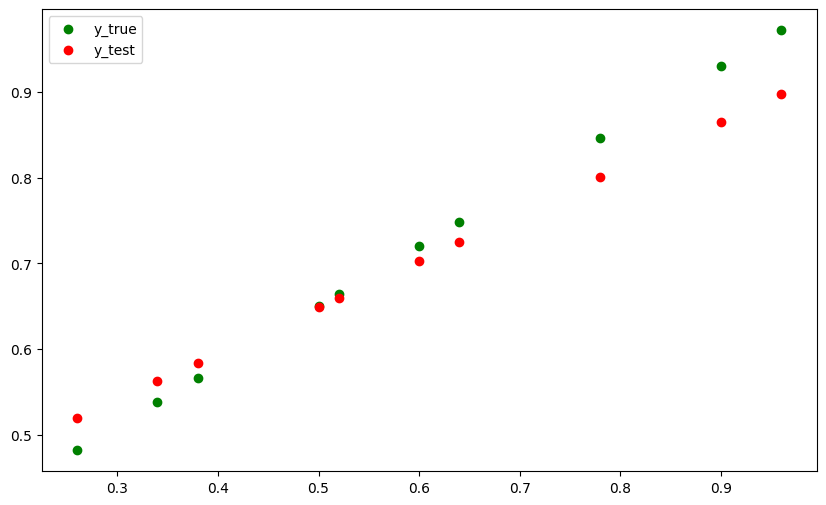

In [30]:
plot(x_test, y_test,x_test, y_pred)

In [31]:
epoch_count = torch.tensor(epoch_count).numpy()
loss_values = torch.tensor(loss_values).numpy()
test_loss_values = torch.tensor(test_loss_values).numpy()

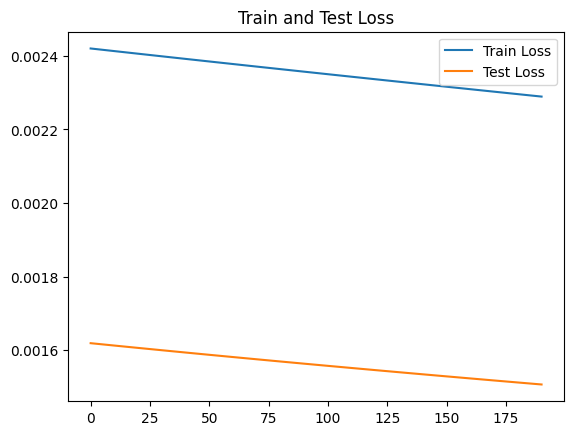

In [32]:
plt.plot(epoch_count, loss_values, label='Train Loss')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Train and Test Loss')
plt.legend()

# Saving and Loading a model

### Three Methods to be noted
* `torch.save()`
* `torch.load()`
* `torch.nn.Module.load_state_dict()`

In [36]:
# Saving our PyTorch model
from pathlib import Path as path

#Create models Directory
Model_Path = path("models")
Model_Path.mkdir(parents=True, exist_ok=True)

# Create Model Save Path
Model_Name = '01_PyTorch_Workflows.pth'
Model_Save_Path = Model_Path/Model_Name

#Save the model
print(f'Saving Model to: {Model_Save_Path}')
torch.save(obj=model_0.state_dict(),f=Model_Save_Path)

Saving Model to: models\01_PyTorch_Workflows.pth


In [37]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5402])), ('bias', tensor([0.3789]))])

In [38]:
#Loading a PyTorch Model

#Instantiate the LinearRegression model
loaded_model = LinearRegression()

#load the model from saved directory
loaded_model.load_state_dict(torch.load(f=Model_Save_Path))
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.5402])), ('bias', tensor([0.3789]))])

In [39]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_y_pred = loaded_model(x_test)

loaded_model_y_pred

tensor([[0.5194],
        [0.8003],
        [0.7031],
        [0.8651],
        [0.5626],
        [0.8976],
        [0.6598],
        [0.6490],
        [0.7247],
        [0.5842]])

In [40]:
y_pred == loaded_model_y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Puting it alltogether
#### also using cuda -device


In [41]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
print(torch.__version__)

# Check if CUDA is available
print(torch.cuda.is_available())

# Check if cuDNN is enabled 
print(torch.backends.cudnn.enabled)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using Device: {device}')

2.3.1+cu121
True
True
Using Device: cuda


## Data

In [52]:
# Creating data using linearRegression formula
weight = 0.7
bias = 0.3

#create range values
start = 0
end = 1
step = 0.02

#Create X and Y
X = torch.arange(start,end,step).unsqueeze(1)
Y = weight * X + bias
X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [54]:
#spliting data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

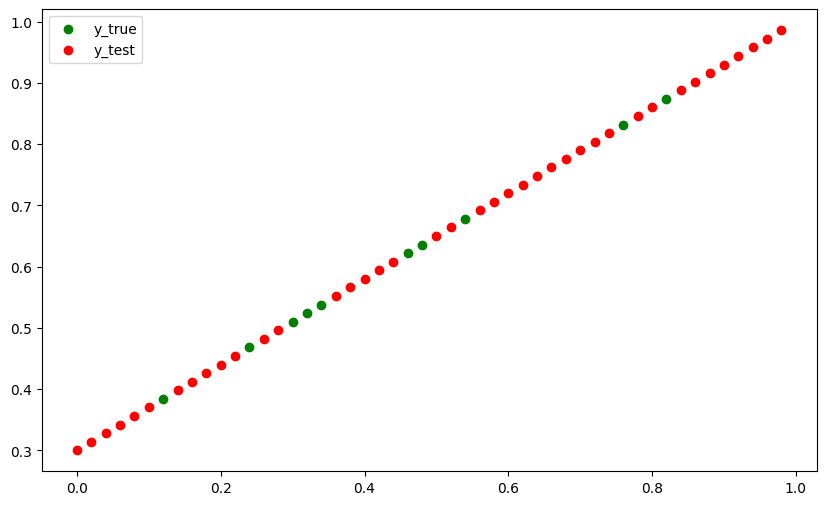

In [55]:
#plot the data
plot(x_test,y_test,x_train,y_train)

In [56]:
# Building the Model
class LinearRegression2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,out_features=1)

    def forward(self, x: torch.Tensor) ->torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_1 =LinearRegression2()
model_1,model_1.state_dict()

(LinearRegression2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [57]:
# Seting device to cuda
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [58]:
# loss fns
loss_fn = nn.L1Loss()

#setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.01)

In [61]:
# Training loop + testing loop
torch.manual_seed(42)
epochs = 200

#Put data to cuda
x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range (epochs):
    model_1.train()

    #Forward Pass
    y_pred = model_1(x_train)

    #Calculate loss
    loss = loss_fn(y_pred,y_train)

    #Optimize zero grad
    optimizer.zero_grad()

    #perform Backpropagation
    loss.backward()

    #Optimize Step
    optimizer.step()
    
    #testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(x_test)
        test_loss = loss_fn(test_pred,y_test)

    if epoch % 10 == 0:
        print(f'epoch :{epoch} | Train Loss :{loss} | Test Loss :{test_loss} |')


epoch :0 | Train Loss :0.5624708533287048 | Test Loss :0.5460726618766785 |
epoch :10 | Train Loss :0.4371701180934906 | Test Loss :0.4240414798259735 |
epoch :20 | Train Loss :0.31186944246292114 | Test Loss :0.30201026797294617 |
epoch :30 | Train Loss :0.1865687221288681 | Test Loss :0.17997907102108002 |
epoch :40 | Train Loss :0.06152328848838806 | Test Loss :0.05937270075082779 |
epoch :50 | Train Loss :0.03773471340537071 | Test Loss :0.03392624855041504 |
epoch :60 | Train Loss :0.03234489634633064 | Test Loss :0.028107617050409317 |
epoch :70 | Train Loss :0.02706099860370159 | Test Loss :0.023635460063815117 |
epoch :80 | Train Loss :0.021784190088510513 | Test Loss :0.0188266821205616 |
epoch :90 | Train Loss :0.016500089317560196 | Test Loss :0.01401789765805006 |
epoch :100 | Train Loss :0.011218181811273098 | Test Loss :0.00954575277864933 |
epoch :110 | Train Loss :0.005941375624388456 | Test Loss :0.004736974835395813 |
epoch :120 | Train Loss :0.008171568624675274 | Te

In [62]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6917]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2960], device='cuda:0'))])

## Making and evaluating prediction

In [63]:
# Turn model into evaluation mode
model_1.eval()

#make preditions on the test data
with torch.inference_mode():
    y_pred = model_1(x_test)
y_pred

tensor([[0.5312],
        [0.4620],
        [0.8632],
        [0.6142],
        [0.5173],
        [0.5035],
        [0.8217],
        [0.3790],
        [0.6280],
        [0.6695]], device='cuda:0')

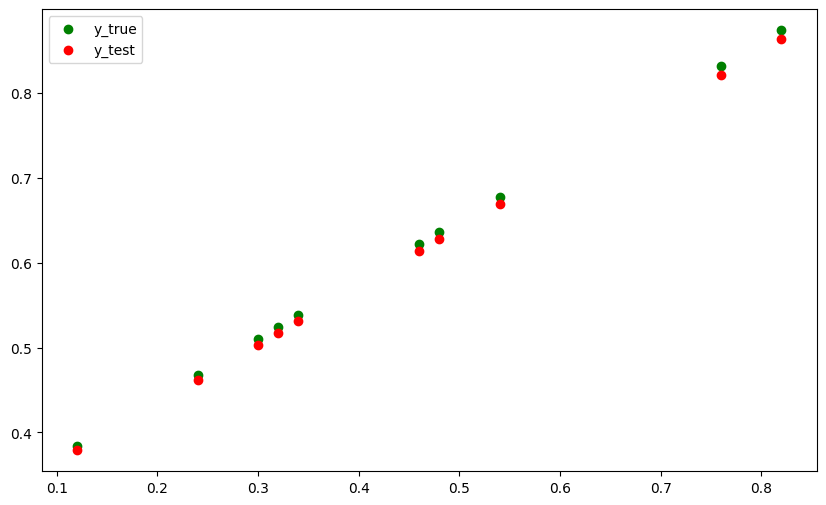

In [65]:
plot(x_test.cpu(), y_test.cpu(), x_test.cpu(),y_pred.cpu())

# Saving And Loading model

In [66]:
from pathlib import Path

#Creating Model Directory
Model_Path = Path("models")
Model_Path.mkdir(parents=True,exist_ok=True)

#Create model save
Model_Name = "01_PyTorch_Workflows_model2.pth"
Model_Save_Path = Model_Path/Model_Name

#Saving the model
print(f"Saving the model to : {Model_Save_Path}")
torch.save(obj=model_1.state_dict(), f=Model_Save_Path)


Saving the model to : models\01_PyTorch_Workflows_model2.pth


In [67]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6917]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2960], device='cuda:0'))])

In [80]:
# Loading model
loaded_model_1 = LinearRegression2() # Crated Instence
loaded_model_1.load_state_dict(torch.load(Model_Save_Path))
loaded_model_1.to(device)
loaded_model_1,loaded_model_1.state_dict()

(LinearRegression2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.6917]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.2960], device='cuda:0'))]))

In [81]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [83]:
# Predicting using loaded module
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_y_pred = loaded_model_1(x_test)

loaded_model_1_y_pred == y_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

# -- The end --